In [1]:
!pip install minisom
!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"

url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/som_data.csv"

# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

df = pd.read_csv(url)



In [3]:
# # Filter rows where any of the specified columns contain 0
# rows_to_remove = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# # Remove the filtered rows from the DataFrame
# df = df.drop(rows_to_remove.index)

# # Display the updated DataFrame
# print(df)


In [4]:
# import pandas as pd

# # Assuming your DataFrame is already defined as df

# # Filter rows where label equals 0
# filtered_df = df[df['label'] == 0]

# # Concatenate the filtered rows into a new DataFrame
# result_df = pd.concat([filtered_df[col] for col in filtered_df.columns], axis=1)

# # Reset index if needed
# result_df.reset_index(drop=True, inplace=True)

# # Display the resulting DataFrame
# print(result_df)
# traindf = (result_df)


In [5]:
# # Import necessary libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Step 1: Visualize distributions of numerical features
# sns.pairplot(df)
# plt.show()

# # Step 2: Calculate summary statistics
# summary_stats = df.describe()
# print(summary_stats)

# # Step 3: Detect outliers using Z-score
# from scipy import stats

# # Define a function to detect outliers using Z-score
# def detect_outliers_zscore(data):
#     z_scores = stats.zscore(data)
#     abs_z_scores = abs(z_scores)
#     outlier_indices = (abs_z_scores > 3).any(axis=1)
#     return outlier_indices

# # Apply the function to numerical columns
# numerical_columns = ['etpSrcP', 'etpDstP', 'totalPacket']
# outliers_zscore = detect_outliers_zscore(df[numerical_columns])

# # Step 4: Visualize outliers using box plots
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df[numerical_columns])
# plt.title('Box plot of numerical features')
# plt.show()

# # Print rows containing outliers
# print(df[outliers_zscore])



In [6]:
# # Filter rows where any of the specified columns contain 0
# rows_with_zero_value = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# # Display the filtered rows
# print(rows_with_zero_value)
# len(rows_with_zero_value)
# rows_with_zero_value

In [7]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP  etpSrcP  etpDstP  etpProtocol  totalPacket  label
0       1.0     -0.0     -0.0         -0.0            0      0
1       1.0     -0.0     -0.0         -0.0            8      0
2       1.0     -0.0     -0.0         -0.0           16      0
3       1.0     -0.0     -0.0         -0.0           24      0
4       1.0     -0.0     -0.0         -0.0           32      0


In [8]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     890 non-null    float64
 1   etpSrcP      890 non-null    float64
 2   etpDstP      890 non-null    float64
 3   etpProtocol  890 non-null    float64
 4   totalPacket  890 non-null    int64  
 5   label        890 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 41.8 KB
None
         etpSrcIP     etpSrcP     etpDstP  etpProtocol   totalPacket  \
count  890.000000  890.000000  890.000000   890.000000  8.900000e+02   
mean     5.859651    5.163579    0.491413     0.083524  5.303712e+04   
std      4.108636    4.766385    1.065047     0.181248  2.799402e+05   
min      1.000000   -0.000000   -0.000000    -0.000000  0.000000e+00   
25%      1.811278    0.000000    0.000000     0.000000  1.282500e+02   
50%      4.141789    3.197070    0.011676     0.011676  2.580000e+02   


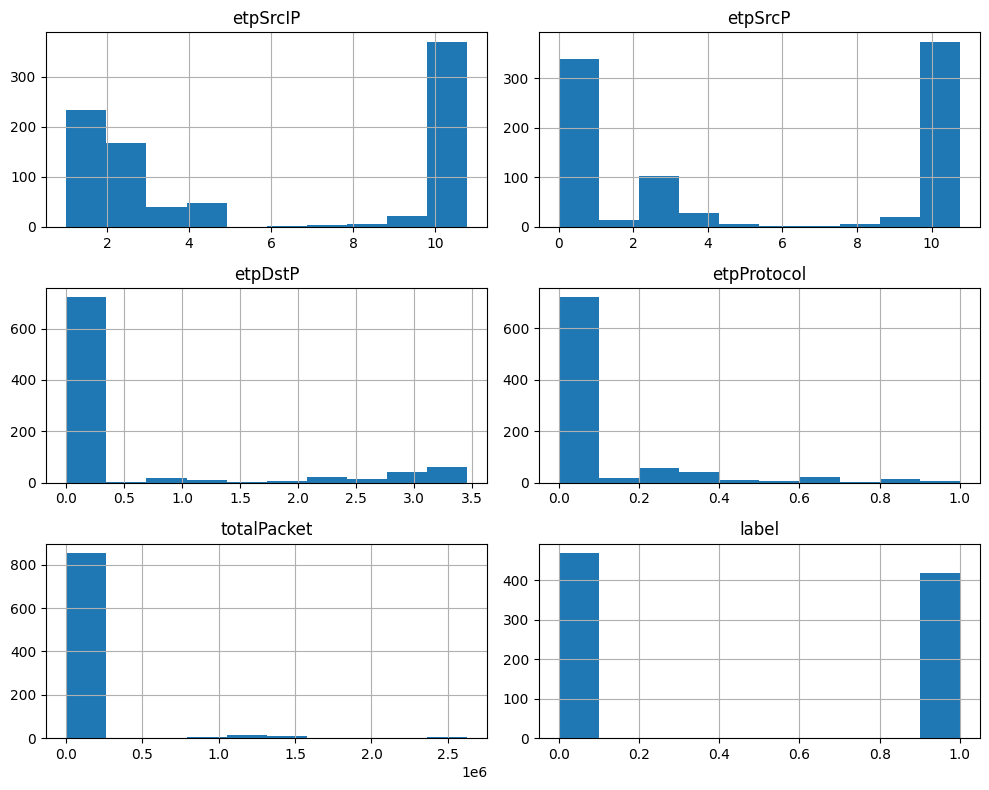

In [9]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



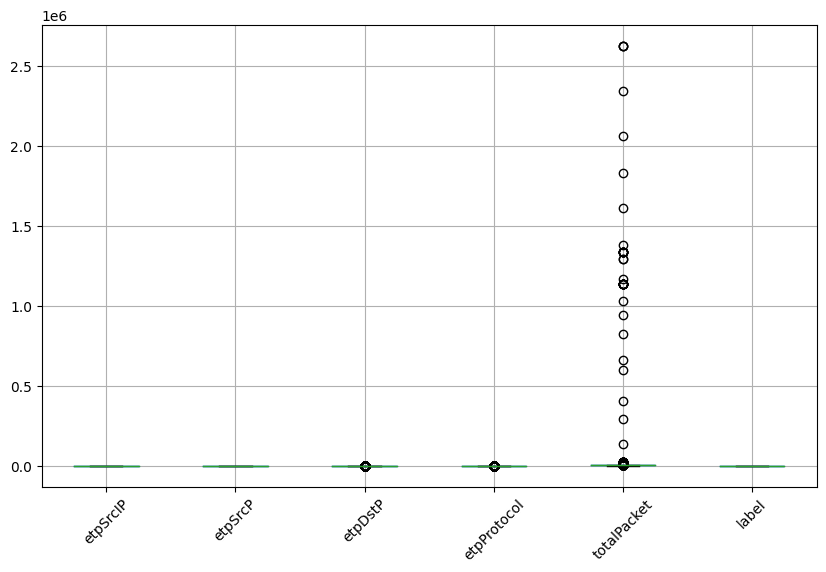

In [10]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [11]:
import numpy as np

In [12]:
# df = pd.read_csv(url)

# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements
print("mean_std_dict", mean_std_dict)

   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  0.441135  0.446044  0.476946     0.476975     0.490528      0
1  0.441135  0.446044  0.476946     0.476975     0.490530      0
2  0.441135  0.446044  0.476946     0.476975     0.490531      0
3  0.441135  0.446044  0.476946     0.476975     0.490532      0
4  0.441135  0.446044  0.476946     0.476975     0.490534      0
mean_std_dict {'etpSrcIP': (5.859651345851808, 4.108635928476103), 'etpSrcP': (5.163579388055372, 4.766385146457139), 'etpDstP': (0.4914131701108134, 1.0650466840364472), 'etpProtocol': (0.08352360984968017, 0.18124781089100866), 'totalPacket': (53037.1202247191, 279940.165663548)}


In [13]:
mean_std_dict

{'etpSrcIP': (5.859651345851808, 4.108635928476103),
 'etpSrcP': (5.163579388055372, 4.766385146457139),
 'etpDstP': (0.4914131701108134, 1.0650466840364472),
 'etpProtocol': (0.08352360984968017, 0.18124781089100866),
 'totalPacket': (53037.1202247191, 279940.165663548)}

In [14]:
# Data Visualization
# Plotting histograms for numerical features
# df.hist(figsize=(10, 8))
# plt.tight_layout()
# plt.show()


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
print(df.shape)
print(normalized_df.shape)

(890, 6)
(890, 6)


In [17]:
false_only_df = df[df['label'] == 0]

In [18]:
# normalized_df['label']

In [19]:
false_only_df.shape

(470, 6)

In [20]:
import pandas as pd

# Assuming your DataFrame is already defined as df

# Filter rows where label equals 0
filtered_df = normalized_df[normalized_df['label'] == 0]
print("Filtered df", filtered_df)
# Concatenate the filtered rows into a new DataFrame
result_df = pd.concat([filtered_df[col] for col in filtered_df.columns], axis=1)

# Reset index if needed
result_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print("result",result_df)
traindf = (result_df)


Filtered df      etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0    0.441135  0.446044  0.476946     0.476975     0.490528      0
1    0.441135  0.446044  0.476946     0.476975     0.490530      0
2    0.441135  0.446044  0.476946     0.476975     0.490531      0
3    0.441135  0.446044  0.476946     0.476975     0.490532      0
4    0.441135  0.446044  0.476946     0.476975     0.490534      0
..        ...       ...       ...          ...          ...    ...
885  0.463396  0.446044  0.476946     0.476975     0.490746      0
886  0.463396  0.446044  0.476946     0.476975     0.490754      0
887  0.463396  0.446044  0.476946     0.476975     0.490761      0
888  0.463396  0.446044  0.476946     0.476975     0.490768      0
889  0.463396  0.446044  0.476946     0.476975     0.490775      0

[470 rows x 6 columns]
result      etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0    0.441135  0.446044  0.476946     0.476975     0.490528      0
1    0.441135  0.44

In [21]:
X = normalized_df.iloc[:, :-1].values
y = normalized_df.iloc[:, -1].values


In [22]:
trainX = traindf.iloc[:, :-1].values
trainy = traindf.iloc[:, -1].values


In [23]:
# 0 ony train
trainX.shape

(470, 5)

In [24]:
# All train set
X.shape

(890, 5)

In [25]:
data = X

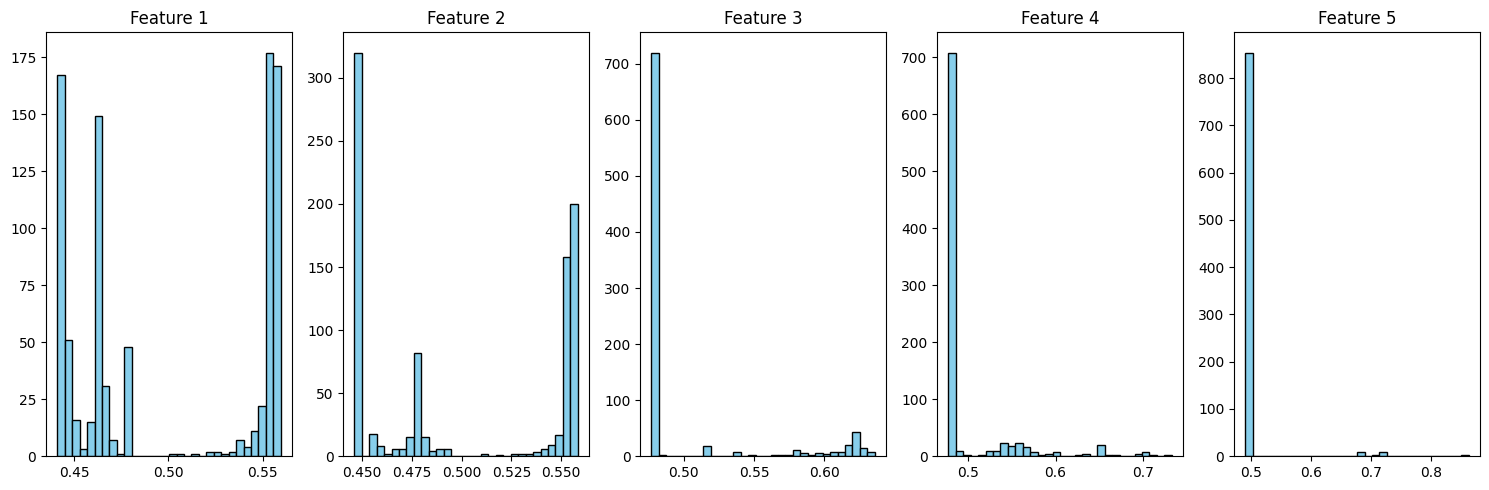

In [26]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [27]:
X

array([[0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052819],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052962],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49053105],
       ...,
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49076066],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.4907678 ],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49077495]])

In [28]:
# # from sklearn.preprocessing import MinMaxScaler

# # sc = MinMaxScaler(feature_range=(0, 1))
# # X = sc.fit_transform(X)


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Assuming df contains only numerical columns that need to be scaled


# # # # Normalization
# # # scaler = MinMaxScaler()
# # # df_normalized = X.copy()
# # # df_normalized = scaler.fit_transform(df)

# # # Standardization
# # scaler = StandardScaler()
# # df_standardized = X.copy()
# # df_standardized = scaler.fit_transform(X)

# # X = df_standardized


# # sc = MinMaxScaler(feature_range=(0, 1))
# # X = sc.fit_transform(X)
# # compute required values
# scaler = StandardScaler()
# model = scaler.fit(data)
# scaled_data = model.transform(data)

# X = scaled_data

In [29]:
data = X
data

array([[0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052819],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49052962],
       [0.44113478, 0.44604429, 0.47694633, 0.47697502, 0.49053105],
       ...,
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49076066],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.4907678 ],
       [0.46339635, 0.44604429, 0.47694633, 0.47697502, 0.49077495]])

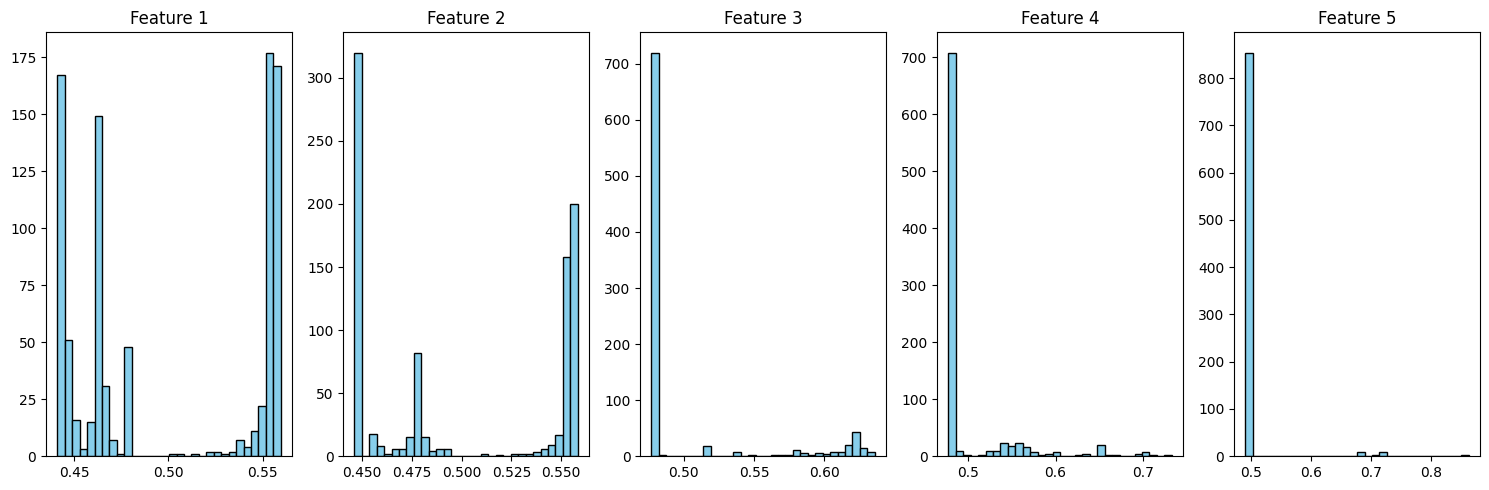

In [30]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [31]:

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Column Name		Missing Values
----------------------------------
etpSrcIP			0
etpSrcP			0
etpDstP			0
etpProtocol			0
totalPacket			0
label			0


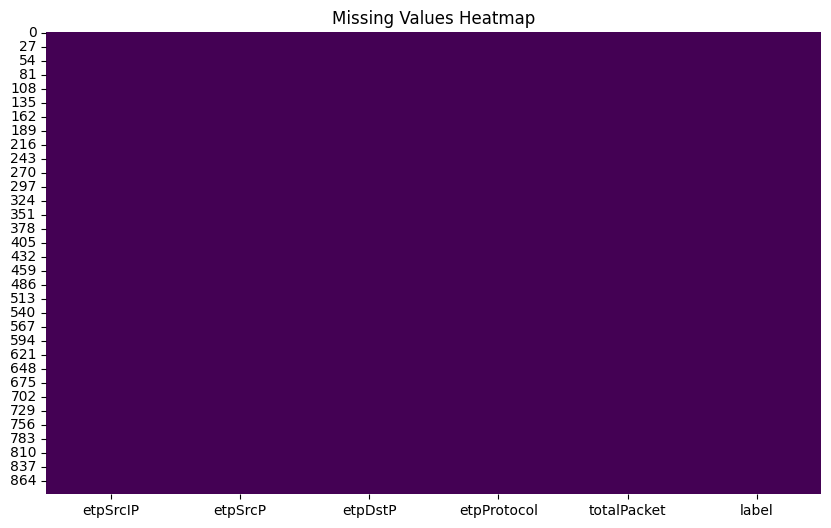

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Listing columns and their respective number of missing values
missing_values = df.isnull().sum()

# Displaying the missing values
print("Column Name\t\tMissing Values")
print("----------------------------------")
for column, missing_count in missing_values.items():
    print(f"{column}\t\t\t{missing_count}")

# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [33]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
import matplotlib.pyplot as plt

In [35]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier


In [36]:
print(X_train.shape)
print(trainX.shape)

(596, 5)
(470, 5)


In [37]:
print(len(trainX))
print(len(X_train))

470
596


In [38]:
print(X_train)
# trainX = X_train

#For all 0 training
X_train = trainX  #For false only training

[[0.44113478 0.44604429 0.47694633 0.47697502 0.49053676]
 [0.55672003 0.55597208 0.47747695 0.48009375 0.49055712]
 [0.55558816 0.55497362 0.47750783 0.4802753  0.49055873]
 ...
 [0.46339635 0.44604429 0.47694633 0.47697502 0.49069085]
 [0.55184636 0.55182813 0.47762454 0.48096151 0.49054462]
 [0.44890883 0.481607   0.63366206 0.52487842 0.49053284]]


In [39]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset

In [40]:
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=15, learning_rate=0.8, random_seed=0 )



In [41]:
som.random_weights_init(X_train)

In [42]:
u_matrixfirst = som.distance_map()  # Get the U-matrix

In [43]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixfirst, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [44]:
# # Create plots to visualize the SOM before and after training
# plt.figure(figsize=(12, 6))

# # Plot before training
# plt.subplot(1, 2, 1)
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels before training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# # Train the SOM for 1000 epochs
# som.train_batch(X_train, 1000, verbose = 'true')

# # Plot after training
# plt.subplot(1, 2, 2)
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels after training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [45]:
# # Visualize the SOM before training
# plt.figure(figsize=(6, 6))
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()

In [46]:
# Train the SOM for 1000 epochs
# som.train_batch(X_train, 10000000, verbose = "true")
som.train_batch(trainX, 1000, verbose = "true")

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.020862434477301645


In [47]:
import pickle

In [48]:
# with open('som.p', 'rb') as infile:
#     som = pickle.load(infile)

In [49]:
u_matrixlast = som.distance_map()  # Get the U-matrix

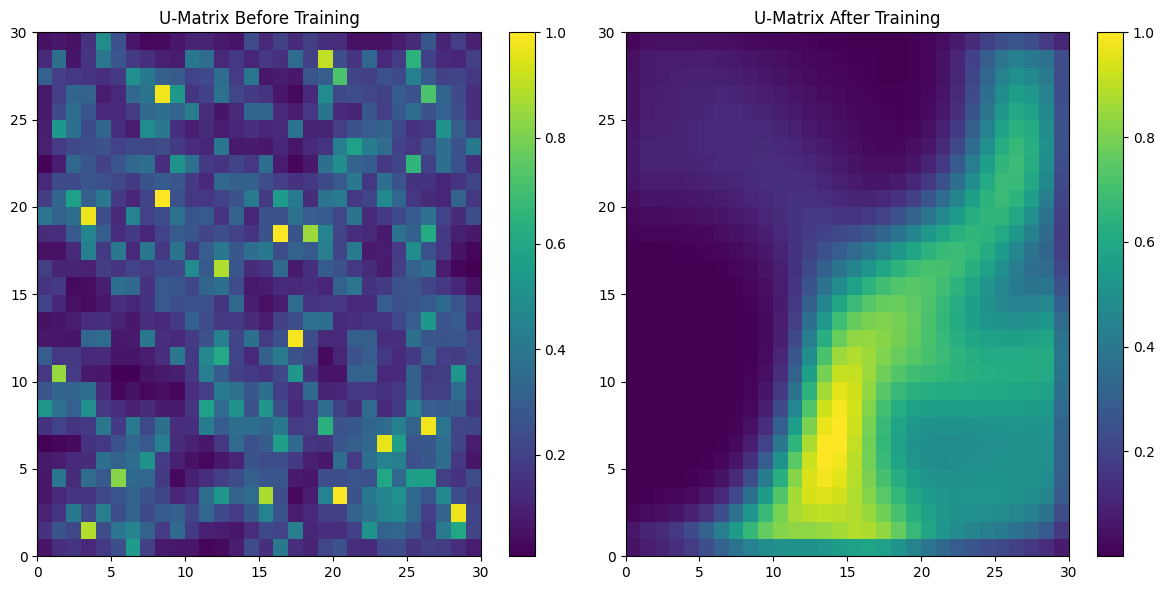

In [50]:
# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [51]:
# testvalues = X_test
# testvalues = X_train
testvalues = X
# testlabels = y_train
testlabels = y


In [52]:
# Calculate the reference point G
g = np.median(som.get_weights(), axis=(0, 1))

# Function to calculate distance between input sample V and reference point G
def calculate_distance(v, g):
    return np.linalg.norm(v - g)

# Function to classify input sample as attack or normal and update y_pred array
def classify_and_update(sample, d_threshold, sigma, y_pred):
  for sam in sample:
    distance_to_g = calculate_distance(sam, g)
    # print("sam and g", sam, g)
    # print("distance_to_g", distance_to_g)
    p_d_greater_than_x = 1 - np.exp(- (distance_to_g / sigma)**2)  # Cumulative distribution function
    is_attack = distance_to_g > d_threshold or p_d_greater_than_x > 0.6  # You can adjust the threshold as needed
    y_pred.append(1 if is_attack else 0)


In [53]:

# Example usage
input_sample = testvalues  # Example input sample (you can replace this with your actual data)
d_threshold = 0.1  # Predefined distance threshold
# d_threshold = 0.10900000000000001
  # Predefined distance threshold
sigma = 0.2  # Probability threshold
# sigma = 0.11400000000000002
 # Probability threshold


y_pred = []  # Initialize the y_pred array
# print(y_pred)
# Classify the input sample and update y_pred array
classify_and_update(input_sample, d_threshold, sigma, y_pred)

print("Predicted labels for the input sample:", y_pred)
ypred = np.array(y_pred)
print(len(ypred))

Predicted labels for the input sample: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [54]:
def classify_and_update_single(sam, d_threshold, sigma, y_pred):
  distance_to_g = calculate_distance(sam, g)
  # print("distance_to_g", distance_to_g)
  p_d_greater_than_x = 1 - np.exp(- (distance_to_g / sigma)**2)  # Cumulative distribution function
  is_attack = distance_to_g > d_threshold or p_d_greater_than_x > 0.6  # You can adjust the threshold as needed
  y_pred.append(1 if is_attack else 0)


In [55]:
ypred.shape

(890,)

In [56]:
testlabels.shape

(890,)

In [57]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0])

In [58]:
y_test.shape

(294,)

In [59]:
ypred.shape

(890,)

In [60]:
testvalues.shape

(890, 5)

In [61]:
len(y_pred)
len(ypred)

890

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testlabels, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8134831460674158


In [63]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_pred, ypred)
# print("Accuracy:", accuracy)

In [64]:
# Evaluate performance
from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred, zero_division=1))
print(classification_report(testlabels, y_pred, zero_division=1))
# Calculate False Detection Rate (FDR)
# precision_recall = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
precision_recall = classification_report(testlabels, y_pred, output_dict=True, zero_division=1)
precision_ddos = precision_recall['1']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       470
           1       0.72      0.99      0.83       420

    accuracy                           0.81       890
   macro avg       0.85      0.82      0.81       890
weighted avg       0.86      0.81      0.81       890

False Detection Rate (FDR): 27.95%


In [65]:
mean_std_dict

{'etpSrcIP': (5.859651345851808, 4.108635928476103),
 'etpSrcP': (5.163579388055372, 4.766385146457139),
 'etpDstP': (0.4914131701108134, 1.0650466840364472),
 'etpProtocol': (0.08352360984968017, 0.18124781089100866),
 'totalPacket': (53037.1202247191, 279940.165663548)}

In [66]:
# Tanh with sngle row
def normalize_with_tanh_estimator_single(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

In [67]:
yrtimepred = []
sam = []

# for i in range(5):
#   sam.append(input(f"Value{i+1}"))
# sam.append(['src_ip_entropy','src_port_entropy','dst_port_entropy','protocol_entropy','total_packets'])

# Define the data list
sam = [1.0,-0.0,-0.0,-0.0,64] #0
# sam = [1.9709505944546686,1.5709505944546684,1.5709505944546684,0.9709505944546686,158] #0
# sam = [10.385063050290164,10.358267802980203,0.012464058820862642,0.012464058820862642,129] #1
# sam.append(sam1)
# print("input", sam)
# sam = [sam]


# Define the columns list (as a tuple, since it represents column names)
# columns = ('src_ip_entropy', ' src_port_entropy', ' dst_port_entropy', ' protocol_entropy', ' total_packets')
columns = ('etpSrcIP', 'etpSrcP', 'etpDstP', 'etpProtocol', 'totalPacket')
# Create a Pandas DataFrame
df = pd.DataFrame([sam], columns=columns)
# print("df", df)
sam_pre = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)
sam_pre = np.array(sam_pre)
# print("sam_pre", sam_pre)
# print("sam", sam)
classify_and_update(sam_pre, d_threshold, sigma, yrtimepred)
# print("yrtimepred", yrtimepred)
if yrtimepred == [1]:
  print("Attack")
else:
  print("Normal")
# print(len(yrtimepred))

Normal


In [68]:
print(columns)

('etpSrcIP', 'etpSrcP', 'etpDstP', 'etpProtocol', 'totalPacket')


In [69]:
print(yrtimepred)
print(len(yrtimepred))

[0]
1


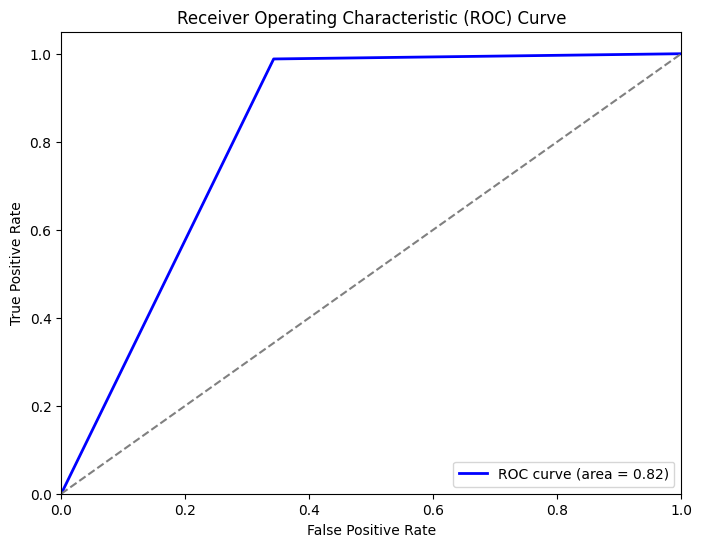

In [70]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(testlabels, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


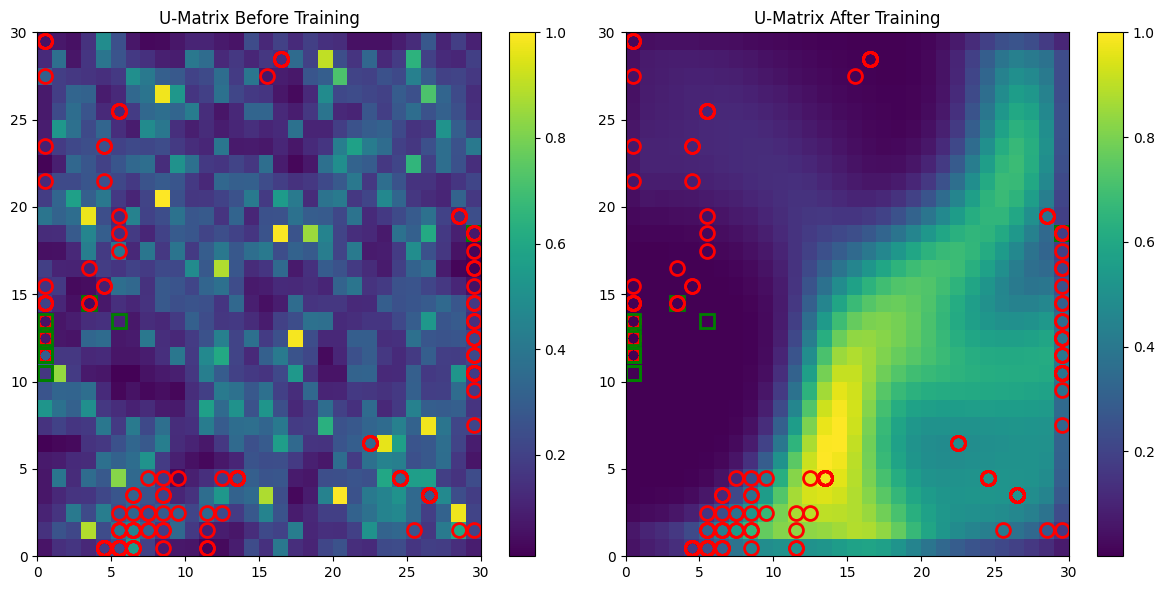

In [71]:
import matplotlib.pyplot as plt

# Assuming you have defined markers and colors based on your class labels
markers = ['o', 's']
colors = ['r', 'g']

# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')

# Add markers based on class labels
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
             markers[y[i]],
             markeredgecolor=colors[y[i]],
             markerfacecolor='None',
             markersize=10,
             markeredgewidth=2)

plt.colorbar()

plt.tight_layout()
plt.show()


In [72]:
#Fixing
testvalues = testlabels

In [73]:

print
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Define the range and step size for sigma and d_threshold
# sigma_min = 0.1
sigma_min = 0.05
# sigma_max = 0.17
sigma_max = 0.099

sigma_step = 0.001

# d_threshold_min = 0.10
d_threshold_min = 0.05
# d_threshold_max = 0.15
d_threshold_max = 0.099
d_threshold_step = 0.001
# Generate arrays of varying values for sigma and d_threshold
sigma_values = np.arange(sigma_min, sigma_max + sigma_step, sigma_step)
d_threshold_values = np.arange(d_threshold_min, d_threshold_max + d_threshold_step, d_threshold_step)



# Print the generated values
print("Sigma values:", sigma_values)
print("d_threshold values:", d_threshold_values)

# Initialize an empty dataframe
df_results = pd.DataFrame(columns=['sigma', 'd_threshold', 'accuracy', 'FDR'])
max = len(sigma_values)*len(d_threshold_values)
i=1
# Example usage loop to calculate accuracy and FDR for each parameter combination
# for sigma in sigma_values:
#     for d_threshold in d_threshold_values:
#         y_pred = []  # Initialize y_pred for each combination of parameters
#         classify_and_update(input_sample, d_threshold, sigma, y_pred)
#         ypred = np.array(y_pred)

#         # Evaluate performance
#         report = classification_report(testvalues, y_pred, zero_division=1, output_dict=True)
#         accuracy = report['accuracy']

#         # Calculate False Detection Rate (FDR)
#         precision_recall = report['1']  # Assuming '1' represents DDoS class
#         FDR = (1 - precision_recall['precision']) * 100

#         # Append the results to the dataframe
#         df_results = df_results.append({'sigma': sigma, 'd_threshold': d_threshold, 'accuracy': accuracy, 'FDR': FDR}, ignore_index=True)
#         print(f"{i} OF {max}")
#         i=i+1



# Initialize an empty list to store results
results_list = []

# Example usage loop to calculate accuracy and FDR for each parameter combination
for sigma in sigma_values:
    for d_threshold in d_threshold_values:
        y_pred = []  # Initialize y_pred for each combination of parameters
        classify_and_update(input_sample, d_threshold, sigma, y_pred)
        ypred = np.array(y_pred)

        # Evaluate performance
        report = classification_report(testvalues, y_pred, zero_division=1, output_dict=True)
        accuracy = report['accuracy']

        # Calculate False Detection Rate (FDR)
        precision_recall = report['1']  # Assuming '1' represents DDoS class
        FDR = (1 - precision_recall['precision']) * 100

        # Append the results to the list
        results_list.append({'sigma': sigma, 'd_threshold': d_threshold, 'accuracy': accuracy, 'FDR': FDR})
        print(f"\r{i} OF {max}")
        i=i+1

# Create the DataFrame after the loop
df_results = pd.DataFrame(results_list)

# Print the dataframe for analysis
print(df_results)








# Print the dataframe for analysis
# print(df_results)


Sigma values: [0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06  0.061
 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072 0.073
 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084 0.085
 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096 0.097
 0.098 0.099]
d_threshold values: [0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06  0.061
 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072 0.073
 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084 0.085
 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096 0.097
 0.098 0.099]
1 OF 2500
2 OF 2500
3 OF 2500
4 OF 2500
5 OF 2500
6 OF 2500
7 OF 2500
8 OF 2500
9 OF 2500
10 OF 2500
11 OF 2500
12 OF 2500
13 OF 2500
14 OF 2500
15 OF 2500
16 OF 2500
17 OF 2500
18 OF 2500
19 OF 2500
20 OF 2500
21 OF 2500
22 OF 2500
23 OF 2500
24 OF 2500
25 OF 2500
26 OF 2500
27 OF 2500
28 OF 2500
29 OF 2500
30 OF 2500
31 OF 2500
32 OF 2500
33 OF 2500


In [74]:
df_results

,sigma,d_threshold,accuracy,FDR
0,0.050,0.050,0.819101,27.710843
1,0.050,0.051,0.819101,27.710843
2,0.050,0.052,0.819101,27.710843
3,0.050,0.053,0.819101,27.710843
4,0.050,0.054,0.819101,27.710843
...,...,...,...,...
2495,0.099,0.095,0.815730,27.854671
2496,0.099,0.096,0.815730,27.854671
2497,0.099,0.097,0.815730,27.854671
2498,0.099,0.098,0.815730,27.854671


In [75]:
y_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0])

In [76]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

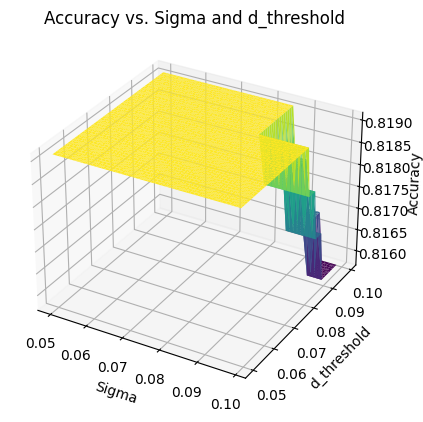

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_results contains the data from the previous code snippet

# Convert dataframe columns to numpy arrays for plotting
sigma_values = df_results['sigma'].values
d_threshold_values = df_results['d_threshold'].values
accuracy_values = df_results['accuracy'].values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(sigma_values, d_threshold_values, accuracy_values, cmap='viridis')

# Set labels and title
ax.set_xlabel('Sigma')
ax.set_ylabel('d_threshold')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs. Sigma and d_threshold')

# Show the plot
plt.show()


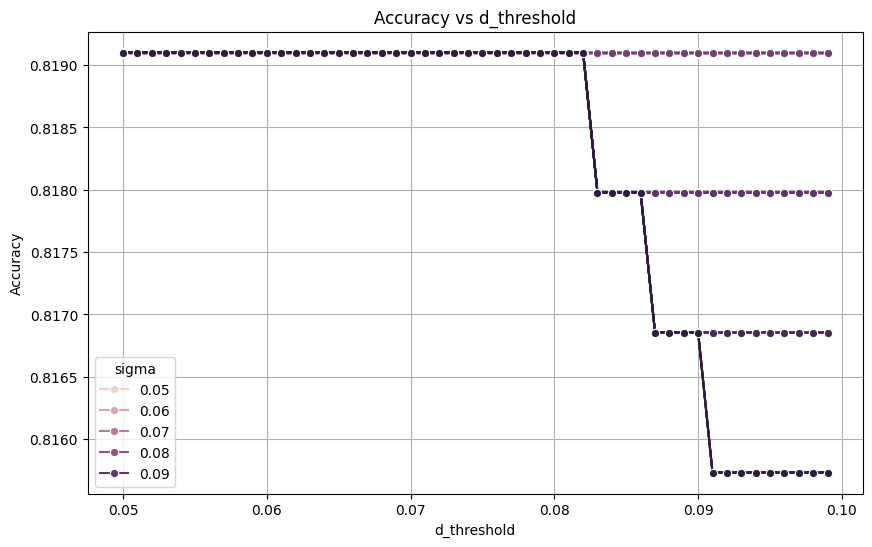

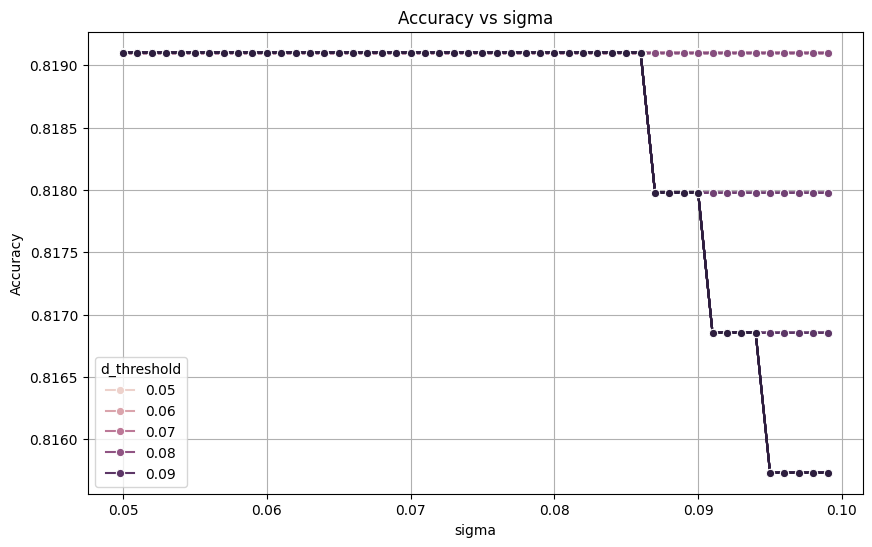

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting changes in accuracy with respect to d_threshold
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='d_threshold', y='accuracy', hue='sigma', marker='o')
plt.title('Accuracy vs d_threshold')
plt.xlabel('d_threshold')
plt.ylabel('Accuracy')
plt.legend(title='sigma')
plt.grid(True)
plt.show()

# Plotting changes in accuracy with respect to sigma
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='sigma', y='accuracy', hue='d_threshold', marker='o')
plt.title('Accuracy vs sigma')
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.legend(title='d_threshold')
plt.grid(True)
plt.show()


In [79]:
# Assuming df_results contains the data from the previous code snippets

# Find the row with maximum accuracy
max_accuracy_row = df_results[df_results['accuracy'] == df_results['accuracy'].max()]

# Extract the corresponding sigma and d_threshold values
max_sigma = max_accuracy_row['sigma'].values[0]
max_d_threshold = max_accuracy_row['d_threshold'].values[0]

# Print the range of sigma and d_threshold values for maximum accuracy
print(f"Range of sigma for maximum accuracy: {max_sigma}")
print(f"Range of d_threshold for maximum accuracy: {max_d_threshold}")


Range of sigma for maximum accuracy: 0.05
Range of d_threshold for maximum accuracy: 0.05


In [80]:
len(y_pred)

890

In [81]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixlast, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [82]:
# # Visualize the SOM after training
# plt.figure(figsize=(6, 6))
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()


In [83]:
import pickle

In [84]:
# saving the som in the file som.p
with open('som_custom.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [85]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [86]:
def map_to_bmu(som, X):
    winner_coordinates = np.array([som.winner(x) for x in X]).T
    return np.ravel_multi_index(winner_coordinates, (som.get_weights().shape[0], som.get_weights().shape[1]))

# Example usage:
# Assuming 'som' is your trained MiniSom model and 'X' is your input data

# Map input data to BMUs
cluster_index = map_to_bmu(som, X_train)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset

# Fit k-NN classifier using cluster indices as features
knn.fit(cluster_index.reshape(-1, 1), y_train)  # Assuming 'y' is your target labels

# Example prediction (you can replace X_test with real-time data)
# Assuming 'X_test' is your test set and 'y_test' is your test set labels
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))



ValueError: Found input variables with inconsistent numbers of samples: [470, 596]

In [ ]:
y_pred.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
X.shape

In [ ]:
# Evaluate performance
print(classification_report(y_test, y_pred))
# Calculate False Detection Rate (FDR)
precision_recall = classification_report(y_test, y_pred, output_dict=True)
precision_ddos = precision_recall['0']  # Assuming '1' represents DDoS class

FDR = (1 - precision_ddos['precision'])* 100
print(f"False Detection Rate (FDR): {FDR:.2f}%")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed


# Step 4: Train the classifier
knn.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Option 1: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Option 2: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Option 3: Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Option 4: Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_train contains the labels (0 and 1) for each data point

# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

plt.tight_layout()
plt.show()
